In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
df = pd.read_csv('ratings.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36
...,...,...,...,...
26024284,270896,58559,5.0,2009-10-31 23:26:04
26024285,270896,60069,5.0,2009-10-31 23:33:52
26024286,270896,63082,4.5,2009-10-31 23:29:24
26024287,270896,64957,4.5,2009-11-01 00:06:30


In [3]:
try:
    stat = df.drop(columns=['timestamp','userId'])
except:
    pass
stat1 = stat.groupby('movieId').mean().reset_index()
stat1['rating'] = stat1['rating'].round(1)

In [4]:
stat1.sort_values(by=['rating'], ascending=False).head(5) #top 5 movies with highest rating

,movieId,rating
41570,167464,5.0
40800,165383,5.0
30985,136826,5.0
31059,136988,5.0
31061,136992,5.0


In [5]:
stat1.sort_values(by=['rating'], ascending=True).head(5) #top 5 movies with lowest rating

,movieId,rating
34120,145966,0.5
41333,166818,0.5
26935,124111,0.5
31104,137088,0.5
26971,124243,0.5


In [6]:
dfc = pd.read_csv("craw.csv")
dfc

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [7]:
import re
pattern = r"{'cast_id': ([^}]+), 'character': ([^}]+), 'credit_id': ([^}]+), 'gender': ([^}]+), 'id': ([^}]+), 'name': ([^}]+), 'order': ([^}]+), 'profile_path': ([^}]+)}"

cast_table = []
for row in range(len(dfc['cast'])):
    cast_id = re.findall(pattern=pattern,string=dfc['cast'][row])
    for i in cast_id:
        cast = {
            'cast_id': int(i[0]),
            'character': str(i[1][1:-1]).replace('"',""),
            'credit_id': str(i[2][1:-1]), 
            'gender': int(i[3]), 
            'id': int(i[4]), 
            'name': str(i[5][1:-1]).replace('"',""), 
            'order': int(i[6]), 
            'profile_path': str(i[7]).replace("'",""),
            'movie_id': dfc["id"][row]
        }
        cast_table.append(cast)
csttbl = pd.DataFrame(cast_table)

In [8]:
pattern2 = r"{'credit_id': ([^}]+), 'department': ([^}]+), 'gender': ([^}]+), 'id': ([^}]+), 'job': ([^}]+), 'name': ([^}]+), 'profile_path': ([^}]+)}"

crew_table = []
for row in range(len(dfc['crew'])):
    crew_id = re.findall(pattern=pattern2,string=dfc['crew'][row])
    for i in crew_id:
        crew = {
            'credit_id': str(i[0][1:-1]).replace('"',""),
            'department': str(i[1][1:-1]).replace('"',""),
            'gender': int(i[2]),
            'id': int(i[3]),
            'job': str(i[4][1:-1]).replace('"',""),
            'name': str(i[5][1:-1]).replace('"',""),
            'profile_path': str(i[6]).replace('"',"").replace("'","")
        }

        crew_table.append(crew)
crwtbl = pd.DataFrame(crew_table)
print(csttbl.shape,crwtbl.shape)

(562474, 9) (464314, 7)


In [9]:
csttbl

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862
...,...,...,...,...,...,...,...,...,...
562469,2,,52fe4ea59251416c7515d7d5,2,544742,Iwan Mosschuchin,0,None,227506
562470,3,,52fe4ea59251416c7515d7d9,1,1090923,Nathalie Lissenko,1,None,227506
562471,4,,52fe4ea59251416c7515d7dd,2,1136422,Pavel Pavlov,2,None,227506
562472,5,,52fe4ea59251416c7515d7e1,0,1261758,Aleksandr Chabrov,3,None,227506


In [10]:
crwtbl

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
464309,52fe4776c3a368484e0c8399,Sound,0,549356,Original Music Composer,Richard McHugh,None
464310,52fe4776c3a368484e0c839f,Camera,2,58818,Director of Photography,João Fernandes,None
464311,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg
464312,58ebbc26925141281908aa0a,Production,2,1195656,Producer,Joseph N. Ermolieff,None


In [11]:
print('NUMBER OF ACTOR: ',len(csttbl["id"].unique()))

NUMBER OF ACTOR:  206158


# TOP 5 ACTORS WITH THE MOST MOVIES

In [12]:
csttbl['character'] = csttbl['character'].str.replace("(voice)", '')
csttbl[csttbl['id'].isin(csttbl.groupby('id').count().reset_index().sort_values(by=['name'], ascending=False).head(5)['id'].to_list())].drop_duplicates(subset=['id']).drop(columns=['credit_id','order','profile_path']).sort_values(by=['cast_id'])

C:\Users\cuoir\AppData\Local\Temp\ipykernel_23912\3559408742.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  csttbl['character'] = csttbl['character'].str.replace("(voice)", '')


,cast_id,character,gender,id,name,movie_id
6587,2,Chabert,2,16927,Gérard Depardieu,41580
16475,7,Quirt Evans,2,4165,John Wayne,22356
11865,8,Evil Sender,2,113,Christopher Lee,16299
2723,9,Zeus Carver,2,2231,Samuel L. Jackson,1572
13755,36,Audience Member (uncredited),1,121323,Bess Flowers,872


In [13]:
df = pd.read_csv('ratings.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
merge1 = csttbl[["id","name","movie_id"]]
merge2 = df[['movieId','rating']]
merge = pd.merge(merge1,merge2,left_on='movie_id',right_on='movieId').drop(columns=['movieId'])
merge = merge.groupby(['id','name']).sum().reset_index()


In [14]:
merge.sort_values(by=['rating'], ascending=False).drop(columns='rating').head(5) #top 5 actors with highest rating

,id,name,movie_id
971,1892,Matt Damon,272531790
32,53,Peter Stormare,321737195
3317,6194,Claire Danes,73772041
1703,3129,Tim Roth,120739378
1393,2636,Alfred Hitchcock,65388713


In [88]:
df = pd.read_csv('moviesinfor.csv')
merge3 = df[['id','title','revenue']]
df

C:\Users\cuoir\AppData\Local\Temp\ipykernel_23912\1423228799.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('moviesinfor.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [89]:
feature = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]
df[feature]

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...,...
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]","[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45462,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]","[{'iso_639_1': 'tl', 'name': ''}]"
45463,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
45464,NaN,[],"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",[]


In [16]:
for i in range(len(merge3)):
    if not merge3['id'][i].isdigit():
        merge3.drop(merge3[merge3['id'] == merge3['id'][i]].index, axis=0, inplace=True)
merge3['id'] = merge3['id'].astype(int)

C:\Users\cuoir\AppData\Local\Temp\ipykernel_23912\2036799183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3.drop(merge3[merge3['id'] == merge3['id'][i]].index, axis=0, inplace=True)
C:\Users\cuoir\AppData\Local\Temp\ipykernel_23912\2036799183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3['id'] = merge3['id'].astype(int)


# TOP 10 ACTOR BRING HIGHEST REVENNUE

In [17]:
merge4 = pd.merge(merge1,merge3,left_on='movie_id',right_on='id').drop(columns=['movie_id'])
merge4.groupby(['id_x','name'])['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(10)

,id_x,name,revenue
4326,7624,Stan Lee,1.941496e+10
1286,2231,Samuel L. Jackson,1.710962e+10
5960,11184,Warwick Davis,1.325603e+10
8060,15831,Frank Welker,1.304415e+10
4447,7907,John Ratzenberger,1.259613e+10
35558,84495,Jess Harnell,1.223461e+10
735,1331,Hugo Weaving,1.102758e+10
731,1327,Ian McKellen,1.101559e+10
55,85,Johnny Depp,1.065376e+10
2668,4566,Alan Rickman,1.061263e+10


In [18]:
import ast 

In [79]:
keyword_df = pd.read_csv('keywords.csv')
keyword_df = keyword_df[keyword_df['keywords'].apply(lambda x: x != [])]
keyword_df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [80]:
dict={'Film_id':[], 'Keywords_id':[],'Keywords':[]}
for i in keyword_df.index.to_list():
    for key_list in ast.literal_eval(keyword_df.iloc[i,1]):
        dict['Film_id'].append(keyword_df.iloc[i,0])
        dict['Keywords_id'].append(key_list['id'])
        dict['Keywords'].append(key_list['name'])
cleaned_keyword_df = pd.DataFrame(dict)
cleaned_keyword_df.head()
# print(f'Null values in cleaned keyword dataframe: \n{cleaned_keyword_df.isnull().sum()}')

,Film_id,Keywords_id,Keywords
0,862,931,jealousy
1,862,4290,toy
2,862,5202,boy
3,862,6054,friendship
4,862,9713,friends


In [81]:
cleaned_keyword_df.to_csv("../cleaned_keywords.csv")

In [21]:
uncle_keyword = cleaned_keyword_df[cleaned_keyword_df['Keywords'].apply(lambda x: 'uncle' == x.lower())]
uncle_keyword.head()

,Film_id,Keywords_id,Keywords
249,37557,6464,uncle
2399,8587,6464,uncle
2664,2758,6464,uncle
3513,11236,6464,uncle
7520,13446,6464,uncle


In [22]:
print('The number of films with the keyword "uncle" is: ', len(uncle_keyword['Film_id'].unique()))

The number of films with the keyword "uncle" is:  42


In [23]:
print('Top 5 keywords with highest frequency:')
cleaned_keyword_df['Keywords'].value_counts().to_frame().head(5)

Top 5 keywords with highest frequency:


,Keywords
woman director,3115
independent film,1930
murder,1308
based on novel,835
musical,734


In [24]:
df = pd.read_csv('moviesinfor.csv')
df

C:\Users\cuoir\AppData\Local\Temp\ipykernel_23912\3656600438.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('moviesinfor.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [25]:
df.value_counts('title')

title
Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
                        ..
Hollywood Hong Kong      1
Hollywood Hot Tubs       1
Hollywood Man            1
Hollywood North          1
ファンタスティポ                 1
Length: 42277, dtype: int64

In [26]:
# Number of films
x = len(df.value_counts('title'))
print(f"Number of Films: {x}")

Number of Films: 42277


In [27]:
# Top 5 revenue films
x = df.sort_values('revenue', ascending=False)[:5]
x[['title','revenue']]

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09


In [28]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [29]:
x = df['production_countries'][0]
eval(x)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [30]:
df['production_countries'] = df['production_countries'].apply(lambda x: eval(x) if isinstance(x, (str, bytes)) else x)
df['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [31]:
df['production_countries'] = df['production_countries'].apply(lambda x: x[0] if (isinstance(x, list) and len(x) > 0) else x)
df['production_countries']

0        {'iso_3166_1': 'US', 'name': 'United States of...
1        {'iso_3166_1': 'US', 'name': 'United States of...
2        {'iso_3166_1': 'US', 'name': 'United States of...
3        {'iso_3166_1': 'US', 'name': 'United States of...
4        {'iso_3166_1': 'US', 'name': 'United States of...
                               ...                        
45461                 {'iso_3166_1': 'IR', 'name': 'Iran'}
45462          {'iso_3166_1': 'PH', 'name': 'Philippines'}
45463    {'iso_3166_1': 'US', 'name': 'United States of...
45464               {'iso_3166_1': 'RU', 'name': 'Russia'}
45465       {'iso_3166_1': 'GB', 'name': 'United Kingdom'}
Name: production_countries, Length: 45466, dtype: object

In [33]:
key_to_extract = 'iso_3166_1'
df['iso_3166_1'] = df['production_countries'].apply(lambda x: x[key_to_extract] if isinstance(x, type(dict)) and key_to_extract in x else None)
df['iso_3166_1']

0        US
1        US
2        US
3        US
4        US
         ..
45461    IR
45462    PH
45463    US
45464    RU
45465    GB
Name: iso_3166_1, Length: 45466, dtype: object

In [34]:
key_to_extract_1 = 'name'
df['Country'] = df['production_countries'].apply(lambda x: x[key_to_extract_1] if isinstance(x, type(dict)) and key_to_extract in x else None)
df['Country']

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: Country, Length: 45466, dtype: object

In [36]:
# df = df.drop(columns = ['extracted_value', 'Name'])
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'iso_3166_1', 'Country'],
      dtype='object')

In [39]:
df = df.dropna(subset=['Country'])
df['Country'].unique()

array(['United States of America', 'Germany', 'United Kingdom', 'France',
       'Italy', 'China', 'Australia', 'South Africa', 'Canada', 'Belgium',
       'Iran', 'Netherlands', 'Hong Kong', 'Tunisia',
       'Dominican Republic', 'Croatia', 'Japan', 'Austria', 'Ireland',
       'Taiwan', 'New Zealand', 'Mexico', 'Peru', 'Cuba', 'Denmark',
       'Finland', 'Spain', 'Iceland', 'South Korea', 'Serbia', 'Sweden',
       'India', 'Argentina', 'Brazil', 'Senegal', 'Burkina Faso',
       'Hungary', 'Philippines', 'Czech Republic', 'Vietnam',
       'Switzerland', 'Trinidad and Tobago', 'Chile', 'Portugal',
       'Russia', 'Norway', 'Ukraine', 'Botswana', 'Aruba', 'Israel',
       'Luxembourg', 'Poland', 'Ecuador', 'Lebanon',
       'Bosnia and Herzegovina', 'Bahamas', 'Macedonia', 'Malaysia',
       'Bhutan', 'Bulgaria', 'Jamaica', 'Greece', "Cote D'Ivoire",
       'Thailand', 'Namibia', 'Cameroon', 'Colombia',
       'Libyan Arab Jamahiriya', 'Algeria', 'Turkey', 'Soviet Union',
       '

In [76]:
top_5_revenue = df.groupby("Country")["revenue"].sum().sort_values(ascending=False).head(5)
# df_revenue = pd.DataFrame(df.groupby("Country")["revenue"].sum())
# top_5_revenue = df_revenue["revenue"].sort_values(ascending=False).head().to_frame()
top_5_revenue.values

array([3.59284599e+11, 4.62864208e+10, 1.89521925e+10, 1.40168448e+10,
       1.30152883e+10])

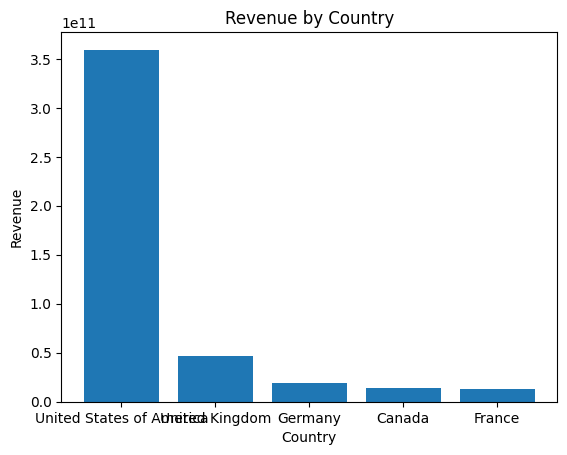

In [77]:
plt.bar(top_5_revenue.index, top_5_revenue.values)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue by Country')
plt.show()